## Large system

We now consider a larger system (e.g., 40 variables). MLE is intractable. Thus, we can just compare the performance of EM with HF and PLE.

As usual, we import the necessary packages to the Jupyter notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import emachine as EM

In [2]:
np.random.seed(0)

###  Weak interactions and large sample size

In [3]:
n_var = 40
g = 0.5
n_seq = 8000

The synthetic data are generated by using `generate_seq`.

In [4]:
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)

We reconstruct the interactions from the sequences `seqs` (or `ops`).

In [5]:
# Erasure Machine (EM)
ops = EM.operators(seqs)
eps_list = np.linspace(0.5,0.8,16)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    #print(eps,E_eps[i])    
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])

w_em = w_eps[ieps]

The optimal value of eps: 0.64


In [6]:
# Hopfield approximation (HF)
w_hf = EM.hopfield_method(seqs)

# Pseudo Likelihood Estimation (PLE)
w_ple = EM.PLE_method(seqs)

We compare the performances of these methods.

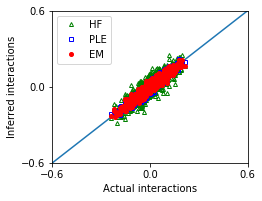

In [7]:
nx,ny = 1,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))

ax.plot([-1,1],[-1,1])
ax.plot(w_true,w_hf,'g^',marker='^',mfc='none',markersize=4,label='HF')
ax.plot(w_true,w_ple,'bs',marker='s',mfc='none',markersize=4,label='PLE')
ax.plot(w_true,w_em,'ro',marker='o',markersize=4,label='EM')
ax.set_xlim([-0.6,0.6])
ax.set_ylim([-0.6,0.6])       
ax.set_xticks([-0.6,0,0.6])
ax.set_yticks([-0.6,0,0.6])
ax.set_xlabel('Actual interactions')
ax.set_ylabel('Inferred interactions')

ax.legend()

In [8]:
MSE_em = ((w_true - w_em)**2).mean()
MSE_hf = ((w_true - w_hf)**2).mean()
MSE_ple = ((w_true - w_ple)**2).mean()

df = pd.DataFrame([['EM',MSE_em],['HF',MSE_hf],['PLE',MSE_ple]],
                  columns = ['Method','Mean squared error'])
df

Method  Mean squared error
0     EM            0.000515
1     HF            0.002071
2    PLE            0.000494

### Weak interactions, and small sample size

In [9]:
n_var = 40
g = 0.5
n_seq = 2000

In [10]:
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)

In [11]:
ops = EM.operators(seqs)
eps_list = np.linspace(0.5,0.8,16)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    #print(eps,E_eps[i])    
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])

w_em = w_eps[ieps]

w_hf = EM.hopfield_method(seqs)
w_ple = EM.PLE_method(seqs)

The optimal value of eps: 0.72


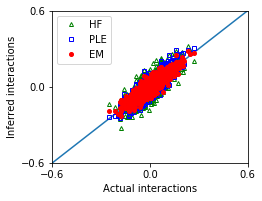

In [12]:
nx,ny = 1,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))

ax.plot([-1,1],[-1,1])
ax.plot(w_true,w_hf,'g^',marker='^',mfc='none',markersize=4,label='HF')
ax.plot(w_true,w_ple,'bs',marker='s',mfc='none',markersize=4,label='PLE')
ax.plot(w_true,w_em,'ro',marker='o',markersize=4,label='EM')
ax.set_xlim([-0.6,0.6])
ax.set_ylim([-0.6,0.6])       
ax.set_xticks([-0.6,0,0.6])
ax.set_yticks([-0.6,0,0.6])
ax.set_xlabel('Actual interactions')
ax.set_ylabel('Inferred interactions')

ax.legend()

In [13]:
MSE_em = ((w_true - w_em)**2).mean()
MSE_hf = ((w_true - w_hf)**2).mean()
MSE_ple = ((w_true - w_ple)**2).mean()

df = pd.DataFrame([['EM',MSE_em],['HF',MSE_hf],['PLE',MSE_ple]],
                  columns = ['Method','Mean squared error'])
df

Method  Mean squared error
0     EM            0.001388
1     HF            0.003787
2    PLE            0.002020

### Strong interactions and large sample size

In [14]:
n_var = 40
g = 1.0
n_seq = 8000

In [15]:
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)

In [16]:
ops = EM.operators(seqs)
eps_list = np.linspace(0.5,0.8,16)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    #print(eps,E_eps[i])    
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])

w_em = w_eps[ieps]

w_hf = EM.hopfield_method(seqs)
w_ple = EM.PLE_method(seqs)

The optimal value of eps: 0.64


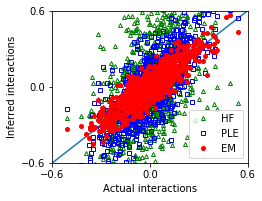

In [17]:
nx,ny = 1,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))

ax.plot([-1,1],[-1,1])
ax.plot(w_true,w_hf,'g^',marker='^',mfc='none',markersize=4,label='HF')
ax.plot(w_true,w_ple,'bs',marker='s',mfc='none',markersize=4,label='PLE')
ax.plot(w_true,w_em,'ro',marker='o',markersize=4,label='EM')
ax.set_xlim([-0.6,0.6])
ax.set_ylim([-0.6,0.6])       
ax.set_xticks([-0.6,0,0.6])
ax.set_yticks([-0.6,0,0.6])
ax.set_xlabel('Actual interactions')
ax.set_ylabel('Inferred interactions')

ax.legend()

In [18]:
MSE_em = ((w_true - w_em)**2).mean()
MSE_hf = ((w_true - w_hf)**2).mean()
MSE_ple = ((w_true - w_ple)**2).mean()

df = pd.DataFrame([['EM',MSE_em],['HF',MSE_hf],['PLE',MSE_ple]],
                  columns = ['Method','Mean squared error'])
df

Method  Mean squared error
0     EM            0.005574
1     HF            0.077182
2    PLE            0.029280

### Strong interactions and small sample size

In [19]:
n_var = 40
g = 1.0
n_seq = 2000

In [20]:
w_true,seqs = EM.generate_seq(n_var,n_seq,g=g)

In [21]:
ops = EM.operators(seqs)
eps_list = np.linspace(0.5,0.8,16)
E_eps = np.zeros(len(eps_list))
w_eps = np.zeros((len(eps_list),ops.shape[1]))
for i,eps in enumerate(eps_list):    
    w_eps[i,:],E_eps[i] = EM.fit(ops,eps=eps,max_iter=100)
    #print(eps,E_eps[i])    
ieps = np.argmax(E_eps)
print('The optimal value of eps:',eps_list[ieps])
w_em = w_eps[ieps]

print('Hopfield')
w_hf = EM.hopfield_method(seqs)

print('PLE')
w_ple = EM.PLE_method(seqs)

The optimal value of eps: 0.68
Hopfield
PLE


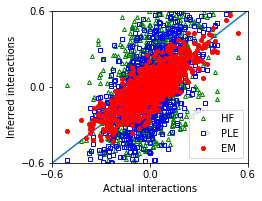

In [22]:
nx,ny = 1,1
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))

ax.plot([-1,1],[-1,1])
ax.plot(w_true,w_hf,'g^',marker='^',mfc='none',markersize=4,label='HF')
ax.plot(w_true,w_ple,'bs',marker='s',mfc='none',markersize=4,label='PLE')
ax.plot(w_true,w_em,'ro',marker='o',markersize=4,label='EM')
ax.set_xlim([-0.6,0.6])
ax.set_ylim([-0.6,0.6])       
ax.set_xticks([-0.6,0,0.6])
ax.set_yticks([-0.6,0,0.6])
ax.set_xlabel('Actual interactions')
ax.set_ylabel('Inferred interactions')

ax.legend()

In [23]:
MSE_em = ((w_true - w_em)**2).mean()
MSE_hf = ((w_true - w_hf)**2).mean()
MSE_ple = ((w_true - w_ple)**2).mean()

df = pd.DataFrame([['EM',MSE_em],['HF',MSE_hf],['PLE',MSE_ple]],
                  columns = ['Method','Mean squared error'])
df

Method  Mean squared error
0     EM            0.009827
1     HF            0.079888
2    PLE            0.061577